<i><b>Public AI</b></i>
<br>
# 합성곱 연산이란

### _Objective_

대부분의 합성곱 연산은 4차원의 데이터를 다룹니다. 이를 어떻게 연산하는 지를 keras 을 활용해 배워봅니다. <br>
  

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import get_file

# \[ 합성곱 연산으로 특징 추출하기 \]

----

합성곱 연산은 딥러닝이 도입되기 이전부터, 컴퓨터비전 분야에서 영상 속 특징을 파악하기 위해,이용된 방법입니다. 몇 가지 예시를 통해, 어떤 식으로 특징을 추출
하는지 파악해보도록 하겠습니다.

## 1. 합성곱 연산의 동작

<img src="https://i.imgur.com/Iglf7jZ.png" width="500">

합성곱을 연산하기 위해서는 입력 특징 맵과 필터가 필요합니다.<br>

### (1) 입력 특징 맵과 필터를 구성하기

In [3]:
features = np.array([
    [ 1, 1, 1, 0, 0],
    [ 0, 1, 1, 1, 0],
    [ 0, 0, 1, 1, 1],
    [ 0, 0, 1, 1, 0],
    [ 0, 1, 1, 0, 0]])

filter_ = np.array([
    [1,0,1],
    [0,1,0],
    [1,0,1]])

In [4]:
print("features : ", features)
print("features shape : ", features.shape)
print("filter : ", filter_)
print("filter shape : ", filter_.shape)

features :  [[1 1 1 0 0]
 [0 1 1 1 0]
 [0 0 1 1 1]
 [0 0 1 1 0]
 [0 1 1 0 0]]
features shape :  (5, 5)
filter :  [[1 0 1]
 [0 1 0]
 [1 0 1]]
filter shape :  (3, 3)


### (2)  합성곱 연산 수행하기


![](https://miro.medium.com/max/1052/1*GcI7G-JLAQiEoCON7xFbhg.gif)

합성곱 연산은 특징 맵에서 필터의 크기만큼 패치를 추출합니다.<br>
해당 패치와 필터끼리 대응하는 원소끼리 곱한 후, 그 총합을 구합니다. 

In [10]:
# convolution 과정 후 결과가 담길 matrix 생성하기
result_h = features.shape[0]- filter_.shape[0] + 1
result_w = features.shape[1]- filter_.shape[1] + 1
filter_h = filter_.shape[0]
filter_w = filter_.shape[1]
result = np.zeros([result_h, result_w])

In [11]:
# Loop 구문을 돌면서 Convolution 연산 수행
result = np.zeros((3,3))
for i in range(0,3):
    for j in range (0,3):
        window = features[i:i+3,j:j+3]
        result[i,j] = np.sum(window * filter_)
        #display(window)

# FIXME
result
        
# FIXME

array([[4., 3., 4.],
       [2., 4., 3.],
       [2., 3., 4.]])

### (3) 합성곱 연산의 장점

1. 변수 공유 (Parameter Sharing) <br>

    이미지의 한 부분에 유의미했던 필터가 다른 부분에서도 동일하게 유의미할 수 있습니다.<br>
    이 덕분에 Parameter의 수가 획기적으로 줄어들 수 있었습니다.

2. 희소 연결 (Sparsity of connections)
    
    출력값이 이미지의 일부(작은 입력값)에 영향을 받고, 나머지 픽셀들의 영향을 거의 받지 않습니다.<br>
    이미지의 일부만 뽑아 처리하기 때문에, 과대적합 문제를 해결할 수 있습니다.

## 2. 예제 ) 선분 추출하기

합성곱 연산은 영상 속에서 특징들을 추출하는 데 쓰입니다. 필터 값에 따라 다양한 특징들이 추출됩니다.
간단한 필터를 통해, 어떤 식으로 영상에서 특징을 추출하는지를 파악할 수 있습니다.<br>

### (1) 이미지 구성하기

아래와 같이 체크무늬로 구성된 이미지를 만들어 보겠습니다.

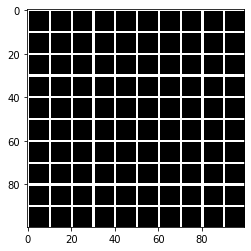

In [12]:
image = np.zeros((100, 100), dtype=np.uint8)
# 10 pixel 씩 건너 뛰면서 행에 픽셀값 10을 부여 합니다. 
image[::10, :] = 10
# 10 pixel 씩 건너 뛰면서 열에 픽셀값 10을 부여 합니다. 
image[:, ::10] = 10

plt.imshow(image,cmap='gray')
plt.show()

### (2) 필터 구성하기

소벨 필터는 대표적인 윤곽선을 잡아주는 필터입니다. 소벨 필터 중 아래는 수평방향에 대한 값의 변화를 잡는 필터입니다. 아래 필터는 소벨 필터로 영상 처리에서 수직선을 잡는데 쓰입니다.

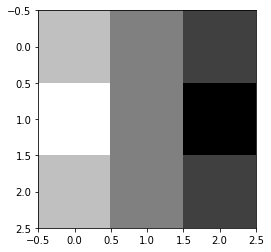

In [13]:
v_filter = np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1],
])
plt.imshow(v_filter,cmap='gray')
plt.show()

### (3) 합성곱 연산 수행하기

위의 필터는 수직 방향의 값이 바뀌는 부분에서만 Edge 부분에서만 값을 가집니다.

In [14]:
result_h = image.shape[0]- v_filter.shape[0] + 1
result_w = image.shape[1]- v_filter.shape[1] + 1
filter_h = v_filter.shape[0]
filter_w = v_filter.shape[1]
result = np.zeros([result_h, result_w], dtype=np.uint8)

In [15]:
# Loop 구문을 돌면서 Convolution 연산 수행
for i in range(0,98):
    for j in range (0,98):
        window = image[i:i+3,j:j+3]
        result[i,j] = np.sum(window * v_filter)

# FIXME
result

array([[30,  0,  0, ...,  0,  0,  0],
       [40,  0,  0, ...,  0,  0,  0],
       [40,  0,  0, ...,  0,  0,  0],
       ...,
       [40,  0,  0, ...,  0,  0,  0],
       [40,  0,  0, ...,  0,  0,  0],
       [40,  0,  0, ...,  0,  0,  0]], dtype=uint8)

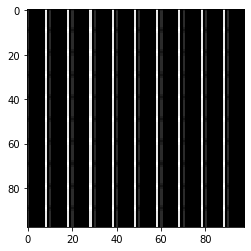

In [16]:
plt.imshow(result, cmap='gray')
plt.show()

### (4) 수평선 추출하기
반대로, 수평 방향으로 구성할 경우 우리는 수평방향 선분만을 추출할 수 있게 됩니다.

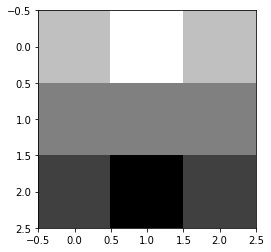

In [17]:
h_filter = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1],
])
plt.imshow(h_filter,cmap='gray')
plt.show()

In [18]:
result_h = image.shape[0]- v_filter.shape[0] + 1
result_w = image.shape[1]- v_filter.shape[1] + 1
filter_h = h_filter.shape[0]
filter_w = h_filter.shape[1]
result = np.zeros([result_h, result_w], dtype=np.uint8)

In [19]:
# Loop 구문을 돌면서 Convolution 연산 수행
for i in range(0,98):
    for j in range (0,98):
        window = image[i:i+3,j:j+3]
        result[i,j] = np.sum(window * h_filter)

# FIXME
result

array([[30, 40, 40, ..., 40, 40, 40],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

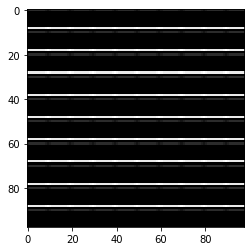

In [20]:
plt.imshow(result,cmap='gray')
plt.show()

## 3. 예제 ) 윤곽선 추출하기


위에서 이용한 수평 방향 필터와 수직 방향 필터의 조합으로 윤곽선을 추출해보도록 하겠습니다.

### (1) 데이터 가져오기

손 이미지를 하나 가져와서, 손의 윤곽선을 추출해보도록 하겠습니다.<br>

24576/20741 [===================================] - 0s 0us/step


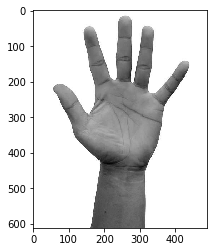

In [21]:
from PIL import Image

fpath = get_file('hands.jpg',
                 'https://s3.ap-northeast-2.amazonaws.com/pai-datasets/alai-deeplearning/hands.jpg' )
hand_image = Image.open(fpath).convert('L')
hand_image = np.array(hand_image)
    
# open CV 을 이용해 image 을 load 합니다.
plt.imshow(hand_image,cmap='gray')
plt.show()

### (2) 수직 방향, 수평 방향 성분 추출하기

아까와 동일하게 필터를 구성해 가져오도록 하겠습니다.

In [22]:
w_sobel = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1],
])

h_sobel = np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1],
])
# hand_image 에 w_sobel filter 을 적용합니다. 
result_h = hand_image.shape[0]- w_sobel.shape[0] + 1
result_w = hand_image.shape[1]- w_sobel.shape[1] + 1
filter_h = w_sobel.shape[0]
filter_w = w_sobel.shape[1]

In [23]:
# Loop 구문을 돌면서 Convolution 연산 수행
w_image = np.zeros((610,488))
h_image = np.zeros((610,488))
for i in range(0,610):
    for j in range(0,488):
        window = hand_image[i:i+3,j:j+3]
        w_image[i,j] = np.sum(window * w_sobel)
        h_image[i,j] = np.sum(window * h_sobel)
# FIXME

### (3) 수직 방향, 수평 방향 성분 시각화하기

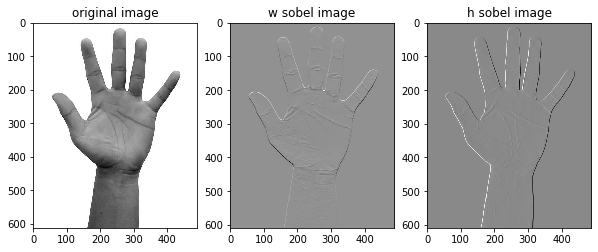

In [24]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,3,1)
ax.set_title('original image')
ax.imshow(hand_image,cmap='gray')
ax = fig.add_subplot(1,3,2)
ax.set_title('w sobel image')
ax.imshow(w_image, cmap='gray')
ax = fig.add_subplot(1,3,3)
ax.set_title('h sobel image')
ax.imshow(h_image, cmap='gray')
plt.show()

### (4) 윤곽선 추출하기

윤곽선은 수평 방향의 성분과 수직 방향의 성분의 제곱 합으로 구성됩니다.<br>

$$
I_{i,j} = \sqrt{W_{i,j}^2+H_{i,j}^2}
$$

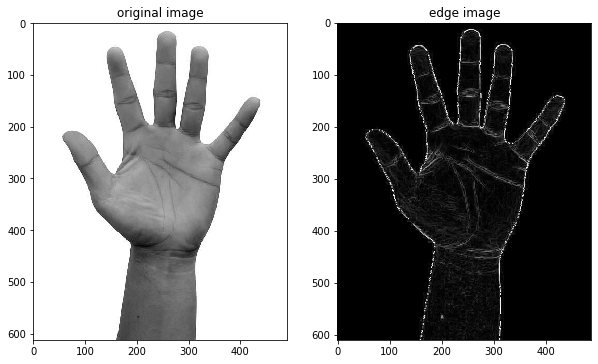

In [25]:
edge_image = np.sqrt(w_image**2 + h_image**2)
edge_image = edge_image.astype(np.uint8)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,2,1)
ax.set_title('original image')
ax.imshow(hand_image,cmap='gray')
ax = fig.add_subplot(1,2,2)
ax.set_title('edge image')
ax.imshow(edge_image,cmap='gray')
plt.show()

## 4. 예제 ) Keras를 활용한 윤곽선 추출하기

Keras의 코드에서 윤곽선은 어떤식으로 추출될 수 있는지를 확인해보도록 하겠습니다.

### (1) 모델 구성하기

In [28]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Model
import tensorflow as tf

In [32]:
inputs = Input(shape=(None, None, 1))

w_conv = Conv2D(filters=1, kernel_size=3, 
                name='w_conv2d', use_bias=False)(inputs)

h_conv = Conv2D(filters=1, kernel_size=3, 
                name='h_conv2d', use_bias=False )(inputs)
filtered = tf.sqrt(w_conv ** 2 + h_conv**2)
model = Model(inputs, filtered)

res_h_sobel = h_sobel[:,:,None,None] # [f_h, f_w, in_ch, out_ch]
res_w_sobel = w_sobel[:,:,None,None] # [f_h, f_w, in_ch, out_ch]
model.get_layer('h_conv2d').set_weights([res_h_sobel])
model.get_layer('w_conv2d').set_weights([res_w_sobel])

### (2) 이미지를 통해 추론하기

In [33]:
res_hand = hand_image[None,:,:,None] # 배치 축과 색 축 추가하기
pred = model.predict(res_hand)

# 후처리
pred = np.squeeze(pred)
pred = pred.astype(np.uint8)

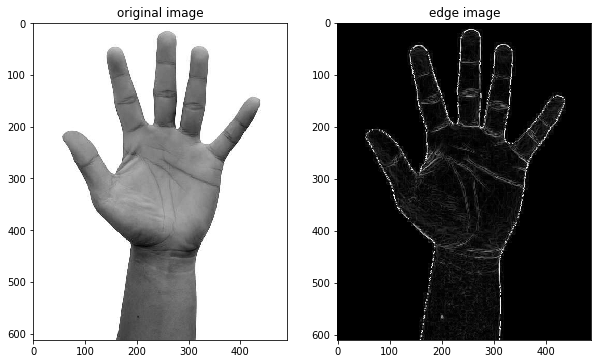

In [35]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,2,1)
ax.set_title('original image')
ax.imshow(hand_image, cmap='gray')
ax = fig.add_subplot(1,2,2)
ax.set_title('edge image')
ax.imshow(pred, cmap='gray')
plt.show()

Convolution Layer가 학습해야 하는 것들은 위와 같이 Convolution 내 Weight들입니다. <br>
손을 구분하는 데 중요한 특징들(외각선, 손금, 손가락의 형태 등)을 convolution Layer가 추출하고 <br>
이를 조합하는 방식으로 진행됩니다.

#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2020/01/13


---